In [18]:
#import required libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import statsmodels.api as sm

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of plots we'll create

In [19]:
#read data form csv
df = pd.read_csv('C:/Users/milan/Desktop/Top 3 airlines with delay.csv')

In [20]:
#exploring the dataset
df.head()

,depdelay,arrdelay,scheduleddepartdatetime,origin,dest,uniquecarrier,marketshareorigin,marketsharedest,hhiorigin,hhidest,...,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
0,-1,-16.0,10:00.0,SFO,JFK,DL,0.085014,0.315041,0.185450,0.330633,...,1,6.766667,0,0,0,0,4699077,101172.340,20275179,82005.258
1,66,72.0,05:00.0,ORD,LGA,OO,0.171907,0.010335,0.205435,0.183892,...,0,0.000000,0,0,0,0,9546326,68883.953,20275179,82005.258
2,-1,0.0,00:00.0,SLC,PHX,OO,0.439035,0.104341,0.333027,0.297710,...,0,0.000000,0,0,0,0,1185978,70920.789,4648498,49695.902
3,24,33.0,55:00.0,PHX,SNA,WN,0.376744,0.462008,0.306923,0.273768,...,0,0.000000,0,0,0,0,4648498,49695.902,13328261,74760.828
4,0,5.0,20:00.0,SAT,DAL,WN,0.509554,0.901766,0.326829,0.819296,...,1,25.000000,0,0,0,0,2426211,49271.848,7253424,69438.477


In [21]:
#checking N/a values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%.'.format(col,pct_missing))

depdelay - 0.0%.
arrdelay - 0.0027946568212701586%.
scheduleddepartdatetime - 0.0%.
origin - 0.0%.
dest - 0.0%.
uniquecarrier - 0.0%.
marketshareorigin - 0.0%.
marketsharedest - 0.0%.
hhiorigin - 0.0%.
hhidest - 0.0%.
nonhubairportorigin - 0.0%.
smallhubairportorigin - 0.0%.
mediumhubairportorigin - 0.0%.
largehubairportorigin - 0.0%.
nonhubairportdest - 0.0%.
smallhubairportdest - 0.0%.
mediumhubairportdest - 0.0%.
largehubairportdest - 0.0%.
nonhubairlineorigin - 0.0%.
smallhubairlineorigin - 0.0%.
mediumhubairlineorigin - 0.0%.
largehubairlineorigin - 0.0%.
nonhubairlinedest - 0.0%.
smallhubairlinedest - 0.0%.
mediumhubairlinedest - 0.0%.
largehubairlinedest - 0.0%.
year - 0.0%.
month - 0.0%.
dayofmonth - 0.0%.
dayofweek - 0.0%.
scheduledhour - 0.0%.
originairportid - 0.0%.
destairportid - 0.0%.
tailnum - 0.0%.
capacity - 0.0%.
loadfactor - 0.0%.
numflights - 0.0%.
origincityname - 0.0%.
originstate - 0.0%.
distance - 0.0%.
monopolyroute - 0.0%.
temperature - 0.00014101479373381534%

In [22]:
#dropping rows with missing information
df = df.dropna()

In [23]:
#verifying N/a% after droping rows

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%.'.format(col,pct_missing))

depdelay - 0.0%.
arrdelay - 0.0%.
scheduleddepartdatetime - 0.0%.
origin - 0.0%.
dest - 0.0%.
uniquecarrier - 0.0%.
marketshareorigin - 0.0%.
marketsharedest - 0.0%.
hhiorigin - 0.0%.
hhidest - 0.0%.
nonhubairportorigin - 0.0%.
smallhubairportorigin - 0.0%.
mediumhubairportorigin - 0.0%.
largehubairportorigin - 0.0%.
nonhubairportdest - 0.0%.
smallhubairportdest - 0.0%.
mediumhubairportdest - 0.0%.
largehubairportdest - 0.0%.
nonhubairlineorigin - 0.0%.
smallhubairlineorigin - 0.0%.
mediumhubairlineorigin - 0.0%.
largehubairlineorigin - 0.0%.
nonhubairlinedest - 0.0%.
smallhubairlinedest - 0.0%.
mediumhubairlinedest - 0.0%.
largehubairlinedest - 0.0%.
year - 0.0%.
month - 0.0%.
dayofmonth - 0.0%.
dayofweek - 0.0%.
scheduledhour - 0.0%.
originairportid - 0.0%.
destairportid - 0.0%.
tailnum - 0.0%.
capacity - 0.0%.
loadfactor - 0.0%.
numflights - 0.0%.
origincityname - 0.0%.
originstate - 0.0%.
distance - 0.0%.
monopolyroute - 0.0%.
temperature - 0.0%.
temp_ninfty_n10 - 0.0%.
temp_n10_0 

In [24]:
#checking the data types
df.dtypes

depdelay                     int64
arrdelay                   float64
scheduleddepartdatetime     object
origin                      object
dest                        object
                            ...   
snowtracedummy               int64
originmetropop               int64
originmetrogdppercapita    float64
destmetropop                 int64
destmetrogdppercapita      float64
Length: 61, dtype: object

In [25]:
#chaning datatypes of columns

df['arrdelay'] = df['arrdelay'].astype('int64')

In [26]:
#checking correlation 
df.corr()

,depdelay,arrdelay,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,...,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
depdelay,1.000000,0.950153,0.004709,-0.004352,-0.001798,-0.008615,-0.026683,-0.004128,0.030349,0.000829,...,0.047088,0.029687,0.081524,0.024017,0.043043,0.024015,0.033234,0.009969,0.017657,0.010843
arrdelay,0.950153,1.000000,0.008237,-0.007491,0.004045,-0.008771,-0.010961,-0.003743,0.012879,0.001585,...,0.053373,0.034498,0.097682,0.025989,0.083685,0.036843,0.013177,0.007142,0.014693,0.007855
marketshareorigin,0.004709,0.008237,1.000000,-0.140935,0.774532,-0.112277,0.101966,-0.028762,0.113904,-0.158371,...,0.010098,0.011105,-0.000292,0.008676,-0.004075,0.003069,-0.057329,-0.079229,-0.066642,0.001412
marketsharedest,-0.004352,-0.007491,-0.140935,1.000000,-0.109524,0.777068,0.090354,0.093485,0.023357,-0.168407,...,-0.004994,-0.006583,-0.006444,-0.008254,-0.005017,-0.016604,-0.072312,-0.001221,-0.063915,-0.101958
hhiorigin,-0.001798,0.004045,0.774532,-0.109524,1.000000,-0.123556,0.144292,-0.068139,0.203348,-0.237665,...,0.017487,0.019712,0.012204,0.015661,-0.001476,0.004507,-0.008488,-0.026027,-0.015826,0.033057
hhidest,-0.008615,-0.008771,-0.112277,0.777068,-0.123556,1.000000,-0.012389,0.013121,-0.022461,0.018906,...,0.001560,-0.004725,0.000821,0.001242,-0.002323,-0.010227,-0.019580,0.037235,-0.017686,-0.058948
nonhubairportorigin,-0.026683,-0.010961,0.101966,0.090354,0.144292,-0.012389,1.000000,-0.245407,-0.272015,-0.435432,...,-0.019281,-0.003935,-0.018272,-0.015175,-0.001611,0.009963,-0.288945,-0.213009,0.056412,0.092620
smallhubairportorigin,-0.004128,-0.003743,-0.028762,0.093485,-0.068139,0.013121,-0.245407,1.000000,-0.233073,-0.373094,...,-0.019386,-0.019797,0.014772,0.009835,-0.011434,-0.008991,-0.171229,0.047840,0.081859,0.034329
mediumhubairportorigin,0.030349,0.012879,0.113904,0.023357,0.203348,-0.022461,-0.272015,-0.233073,1.000000,-0.413547,...,0.024356,0.020676,0.038627,0.015354,-0.005208,-0.011235,0.307892,0.162756,0.000722,-0.005759
largehubairportorigin,0.000829,0.001585,-0.158371,-0.168407,-0.237665,0.018906,-0.435432,-0.373094,-0.413547,1.000000,...,0.011293,0.001605,-0.027776,-0.007385,0.014515,0.007762,0.124029,0.009701,-0.111890,-0.100526


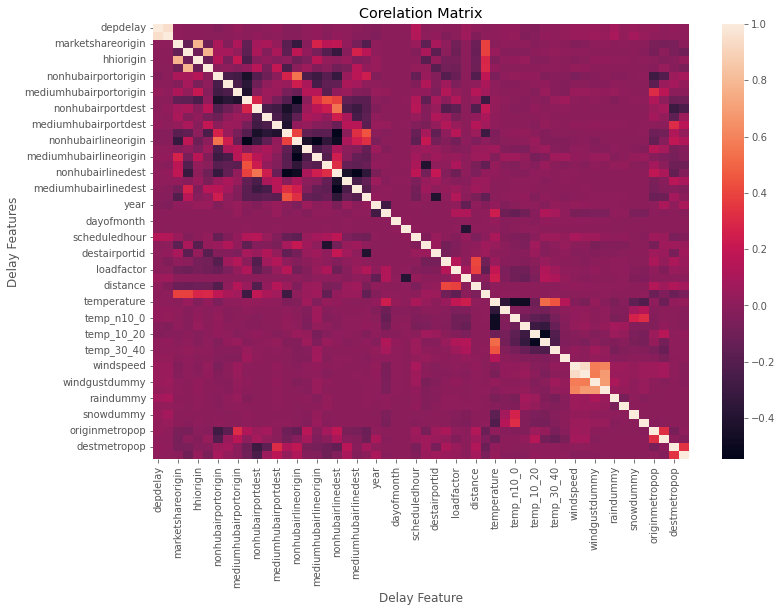

In [27]:
#visualzing the correlation matrix for better readability
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.title('Corelation Matrix')
plt.xlabel('Delay Feature')
plt.ylabel('Delay Features')
plt.show()

Text(0, 0.5, 'Departure Delay')

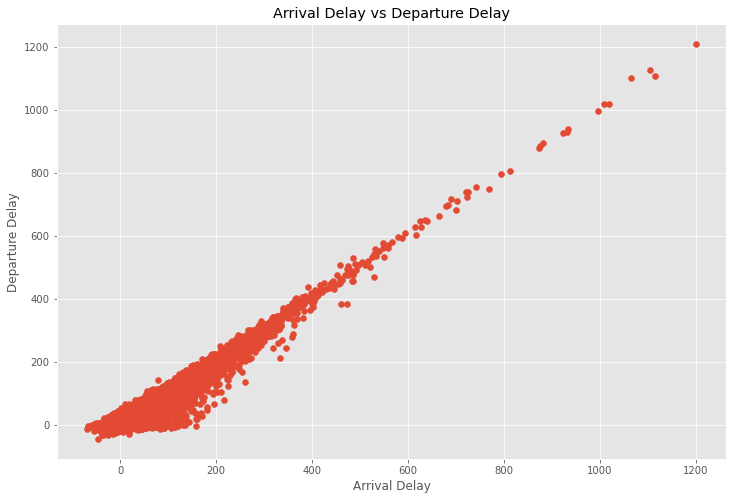

In [28]:
#scatterplot with Arrdelay vs Depdelay 

plt.scatter(x=df['arrdelay'], y=df['depdelay'])
plt.title('Arrival Delay vs Departure Delay')
plt.xlabel('Arrival Delay')
plt.ylabel('Departure Delay')

<AxesSubplot:xlabel='arrdelay', ylabel='depdelay'>

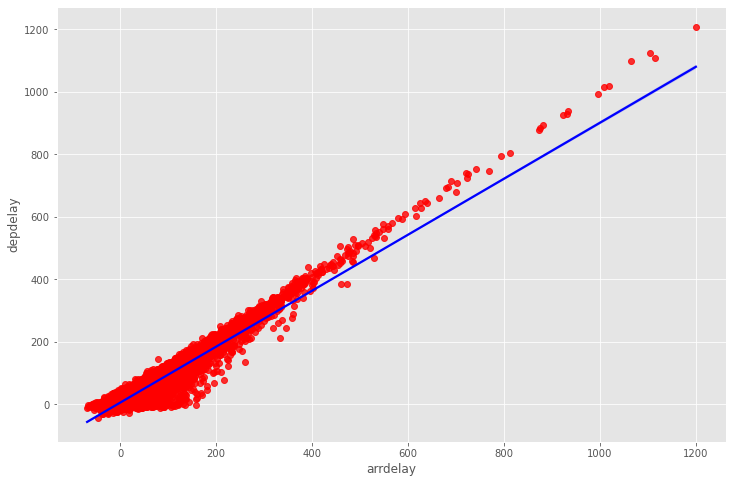

In [29]:
#plot Arrival Delay vs Departure Delay using seaborn

sns.regplot(x='arrdelay',y='depdelay', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [32]:
y = df['depdelay']
x1 = df['arrdelay']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               depdelay   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.445e+06
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:11:49   Log-Likelihood:            -5.9278e+05
No. Observations:              155554   AIC:                         1.186e+06
Df Residuals:                  155552   BIC:                         1.186e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6175      0.028    201.052      0.000       5.563       5.672
arrdelay       0.8958      0.001   1201.925      0.000       0.894       0.897
==============================================================================
Omnibus:                    37698.900   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507783.005
Skew:                          -0.793   Prob(JB):                         0.00
Kurtosis:                      11.708   Cond. No.                         37.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""